In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier


In [ ]:
df = pd.read_csv("spect_train.csv")
df.head()
#df = pd.read_csv("test.csv", header=None,usecols=[1])
df.values.reshape(1,-1)

array([[ 1, 59, 52, ..., 68, 59, 59]])

In [ ]:
df.describe()

,OVERALL_DIAGNOSIS,F1R,F1S,F2R,F2S,F3R,F3S,F4R,F4S,F5R,...,F18R,F18S,F19R,F19S,F20R,F20S,F21R,F21S,F22R,F22S
count,80.000000,80.000000,80.00000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,...,80.00000,80.000000,80.000000,80.00000,80.000000,80.000000,80.00000,80.000000,80.000000,80.000000
mean,0.500000,68.650000,67.55000,69.550000,70.850000,67.100000,67.687500,72.075000,71.387500,64.362500,...,65.18750,64.662500,65.612500,65.01250,69.437500,68.412500,66.33750,65.100000,55.975000,55.075000
std,0.503155,5.594075,6.88403,5.901941,6.326757,6.251278,6.622925,4.090047,5.715831,7.425996,...,5.71273,7.538834,7.694308,9.44336,7.809186,8.582723,10.62591,11.345662,10.779698,12.119422
min,0.000000,57.000000,51.00000,52.000000,51.000000,47.000000,46.000000,63.000000,56.000000,26.000000,...,31.00000,13.000000,33.000000,23.00000,31.000000,30.000000,31.00000,30.000000,11.000000,11.000000
25%,0.000000,64.750000,64.00000,66.000000,67.000000,63.750000,63.750000,68.750000,69.000000,61.000000,...,63.00000,63.000000,62.750000,62.00000,65.000000,65.000000,64.00000,63.000000,53.000000,52.750000
50%,0.500000,69.000000,67.00000,70.000000,72.000000,68.000000,68.500000,72.500000,72.000000,65.000000,...,66.00000,65.500000,66.000000,66.50000,70.500000,71.000000,69.00000,68.000000,59.000000,58.000000
75%,1.000000,72.000000,73.00000,74.000000,75.250000,71.000000,71.250000,75.000000,75.000000,68.250000,...,68.00000,69.000000,71.000000,71.00000,74.000000,74.000000,73.25000,71.000000,63.000000,63.000000
max,1.000000,80.000000,81.00000,82.000000,84.000000,78.000000,89.000000,79.000000,83.000000,77.000000,...,73.00000,73.000000,77.000000,77.00000,83.000000,80.000000,79.00000,83.000000,71.000000,73.000000


In [ ]:
x = df.iloc[:,[1,2]].values
x

array([[59, 52],
       [72, 62],
       [71, 62],
       [69, 71],
       [70, 66],
       [57, 69],
       [69, 66],
       [61, 60],
       [65, 62],
       [74, 73],
       [70, 69],
       [67, 66],
       [76, 69],
       [70, 69],
       [78, 73],
       [67, 51],
       [70, 54],
       [63, 63],
       [62, 56],
       [80, 74],
       [63, 58],
       [70, 65],
       [61, 63],
       [70, 64],
       [75, 71],
       [77, 61],
       [75, 72],
       [78, 76],
       [69, 68],
       [72, 66],
       [64, 64],
       [72, 63],
       [79, 78],
       [66, 81],
       [65, 66],
       [71, 75],
       [70, 66],
       [73, 76],
       [68, 76],
       [68, 64],
       [62, 67],
       [62, 67],
       [59, 68],
       [75, 75],
       [77, 79],
       [68, 64],
       [76, 73],
       [61, 76],
       [67, 65],
       [71, 61],
       [64, 70],
       [76, 75],
       [74, 73],
       [65, 67],
       [59, 75],
       [76, 72],
       [71, 75],
       [80, 76],
       [68, 70

In [ ]:
y = df.iloc[:,[0,3]].values
y

array([[ 1, 70],
       [ 1, 69],
       [ 1, 70],
       [ 1, 70],
       [ 1, 61],
       [ 1, 68],
       [ 1, 62],
       [ 1, 60],
       [ 1, 67],
       [ 1, 72],
       [ 1, 60],
       [ 1, 65],
       [ 1, 78],
       [ 1, 67],
       [ 1, 68],
       [ 1, 73],
       [ 1, 66],
       [ 1, 69],
       [ 1, 66],
       [ 1, 82],
       [ 1, 66],
       [ 1, 65],
       [ 1, 58],
       [ 1, 52],
       [ 1, 54],
       [ 1, 62],
       [ 1, 75],
       [ 1, 71],
       [ 1, 75],
       [ 1, 75],
       [ 1, 70],
       [ 1, 68],
       [ 1, 66],
       [ 1, 75],
       [ 1, 71],
       [ 1, 76],
       [ 1, 66],
       [ 1, 68],
       [ 1, 79],
       [ 1, 65],
       [ 0, 64],
       [ 0, 68],
       [ 0, 69],
       [ 0, 70],
       [ 0, 79],
       [ 0, 74],
       [ 0, 74],
       [ 0, 71],
       [ 0, 77],
       [ 0, 74],
       [ 0, 71],
       [ 0, 68],
       [ 0, 72],
       [ 0, 69],
       [ 0, 70],
       [ 0, 73],
       [ 0, 78],
       [ 0, 75],
       [ 0, 66

In [ ]:
x_train,y_train,x_test,y_test = train_test_split(x,y,test_size = 0.5,random_state = 2)
print(x_train)
print(x_test)

[[65 62]
 [62 71]
 [68 65]
 [75 72]
 [59 75]
 [76 69]
 [65 67]
 [70 54]
 [71 62]
 [69 78]
 [80 74]
 [69 64]
 [69 66]
 [76 73]
 [62 66]
 [75 71]
 [57 69]
 [69 71]
 [66 81]
 [66 67]
 [68 76]
 [71 71]
 [76 75]
 [70 75]
 [59 68]
 [70 66]
 [68 64]
 [73 76]
 [63 58]
 [72 63]
 [59 65]
 [61 76]
 [71 61]
 [65 66]
 [61 60]
 [75 75]
 [61 63]
 [64 53]
 [67 51]
 [62 67]]
[[ 1 67]
 [ 0 78]
 [ 0 72]
 [ 1 75]
 [ 0 70]
 [ 1 78]
 [ 0 69]
 [ 1 66]
 [ 1 70]
 [ 0 74]
 [ 1 82]
 [ 0 73]
 [ 1 62]
 [ 0 74]
 [ 0 66]
 [ 1 54]
 [ 1 68]
 [ 1 70]
 [ 1 75]
 [ 0 63]
 [ 1 79]
 [ 0 69]
 [ 0 68]
 [ 0 72]
 [ 0 69]
 [ 1 61]
 [ 1 65]
 [ 1 68]
 [ 1 66]
 [ 1 68]
 [ 0 53]
 [ 0 71]
 [ 0 74]
 [ 1 71]
 [ 1 60]
 [ 0 70]
 [ 1 58]
 [ 0 74]
 [ 1 73]
 [ 0 64]]


In [ ]:
from sklearn.preprocessing import StandardScaler
st_x=StandardScaler()
x_train=st_x.fit_transform(x_train)
x_test=st_x.transform(x_test)
print(x_train)

[[-0.46819513 -0.8238962 ]
 [-1.00327528  0.48850483]
 [ 0.06688502 -0.38642919]
 [ 1.31540537  0.63432717]
 [-1.53835543  1.07179418]
 [ 1.49376542  0.19686015]
 [-0.46819513 -0.09478452]
 [ 0.42360512 -1.9904749 ]
 [ 0.60196517 -0.8238962 ]
 [ 0.24524507  1.50926119]
 [ 2.20720562  0.92597184]
 [ 0.24524507 -0.53225153]
 [ 0.24524507 -0.24060686]
 [ 1.49376542  0.7801495 ]
 [-1.00327528 -0.24060686]
 [ 1.31540537  0.48850483]
 [-1.89507553  0.19686015]
 [ 0.24524507  0.48850483]
 [-0.28983508  1.9467282 ]
 [-0.28983508 -0.09478452]
 [ 0.06688502  1.21761651]
 [ 0.60196517  0.48850483]
 [ 1.49376542  1.07179418]
 [ 0.42360512  1.07179418]
 [-1.53835543  0.05103782]
 [ 0.42360512 -0.24060686]
 [ 0.06688502 -0.53225153]
 [ 0.95868527  1.21761651]
 [-0.82491523 -1.40718555]
 [ 0.78032522 -0.67807387]
 [-1.53835543 -0.38642919]
 [-1.18163533  1.21761651]
 [ 0.60196517 -0.96971854]
 [-0.46819513 -0.24060686]
 [-1.18163533 -1.11554088]
 [ 1.31540537  1.07179418]
 [-1.18163533 -0.67807387]
 

In [ ]:
classifier = DecisionTreeClassifier(criterion='entropy',random_state=0)
classifier.fit(x_train,y_train)


DecisionTreeClassifier(criterion='entropy', random_state=0)

In [ ]:
y_pred=classifier.predict(x_test)
print(y_pred)

[[77 79]
 [72 70]
 [72 70]
 [72 70]
 [77 79]
 [72 70]
 [77 79]
 [59 52]
 [77 79]
 [72 70]
 [72 70]
 [72 70]
 [59 52]
 [72 70]
 [59 52]
 [70 64]
 [77 79]
 [77 79]
 [72 70]
 [59 52]
 [72 70]
 [77 79]
 [77 79]
 [72 70]
 [77 79]
 [70 64]
 [59 52]
 [77 79]
 [59 52]
 [77 79]
 [70 64]
 [77 79]
 [72 70]
 [77 79]
 [70 64]
 [77 79]
 [70 64]
 [72 70]
 [72 70]
 [59 52]]


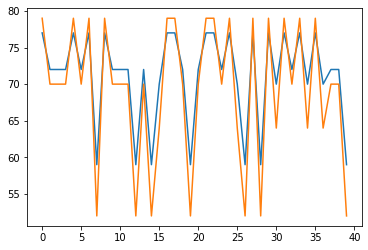

In [ ]:
import matplotlib.pyplot as plt
y_pred=classifier.predict(x_test)
plt.plot(y_pred)
plt.show()